# Name: siddhant gulia 

# IDNo.: N01719385

# Lab 4: Time Series Forecasting

## Use the provided data EnergyProduction.csv to answer all the questions in this Notebook

In [35]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#import the necessary libraries
## Use the provided data EnergyProduction.csv to answer all the questions in this Notebook
import matplotlib.pyplot as plt

In [36]:
#import the your data here with date as index and properly formatted data type as below:
# # EnergyIndex
# DATE	
# 1970-01-01	43.0869
# 1970-02-01	42.5577
# 1970-03-01	41.6215
# 1970-04-01	40.1982
# 1970-05-01	39.9321
# Load the dataset
df = pd.read_csv('EnergyProduction.csv', parse_dates=['DATE'], index_col='DATE')
df.index.freq = 'MS'
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


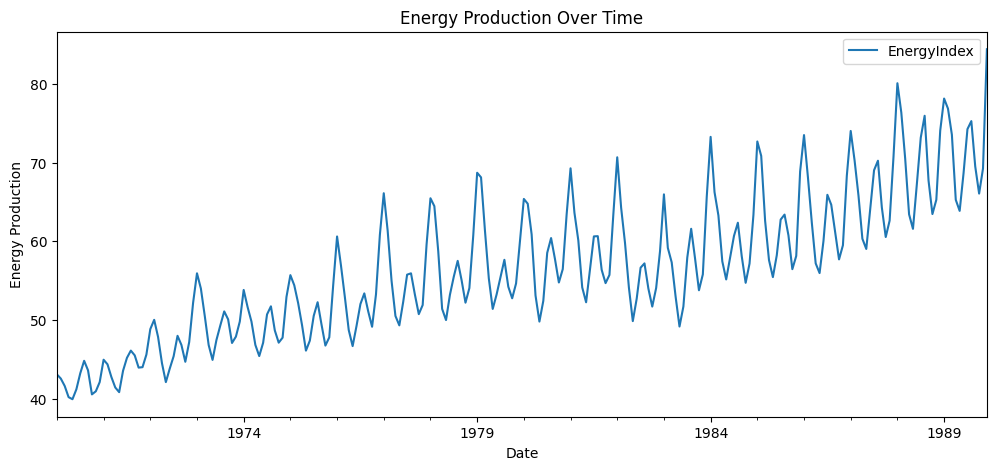

In [37]:
# plot the below plot using the dataset
df.plot()
plt.title('Energy Production Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Production')
plt.show()

In [38]:
# Assign a frequency of 'MS' to the DatetimeIndex as below
# # DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
#                '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
#                '1970-09-01', '1970-10-01',
#                ...
#                '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
#                '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
#                '1989-11-01', '1989-12-01'],
#               dtype='datetime64[ns]', name='DATE', length=240, freq='MS')
df.index.freq = 'MS'
print(df.index)

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')


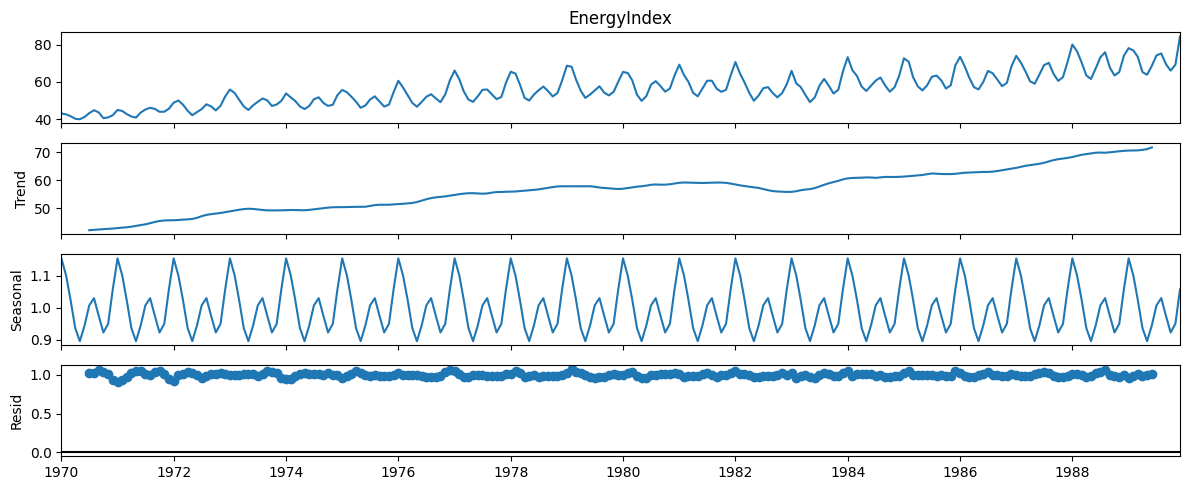

In [39]:
#  Decompose Trend, Cyclic and Error as shown below
result = seasonal_decompose(df['EnergyIndex'], model='multiplicative')
result.plot()
plt.show()

### 4. Change the size of the figure to be more clear.

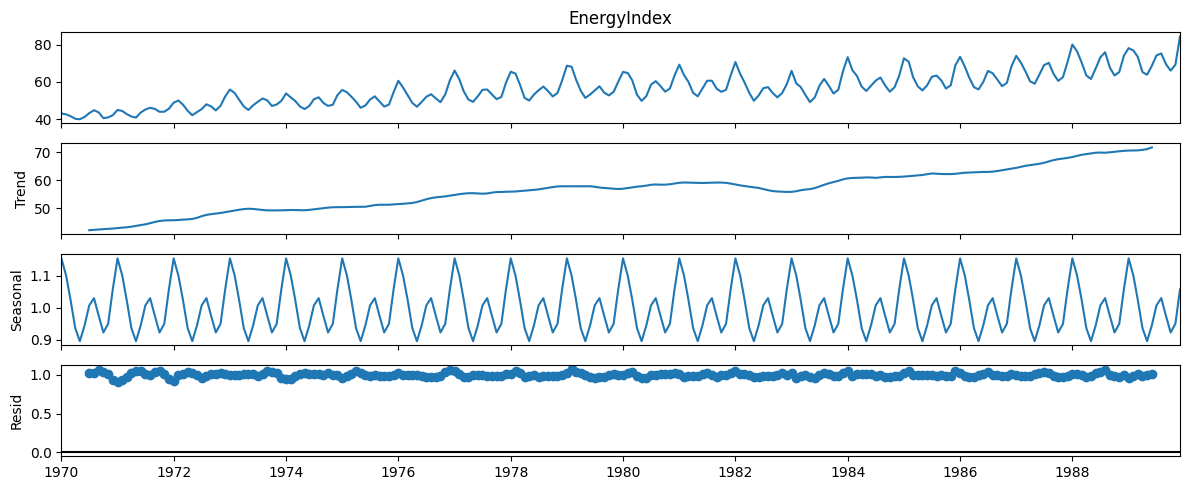

In [40]:
from pylab import rcParams
rcParams["figure.figsize"]= 12,5
result.plot();

### 5. Apply Forcasting on Energy Index

C:\Users\siddh\AppData\Local\Temp\ipykernel_27764\2078982685.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['HW Forecast'] = model.forecast(steps=len(test_data))


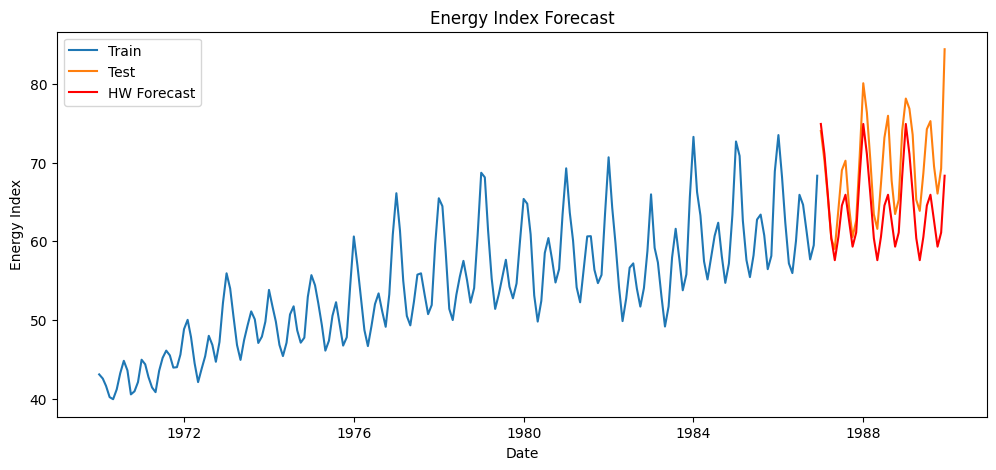

In [41]:
# Apply Forcasting on Energy Index using training data and testing data
# Split the data into training and testing sets
train_data = df[:'1986-12-01']
test_data = df['1987-01-01':]

# Fit the training model using Exponential Smoothing within a period of 12 months
model = ExponentialSmoothing(train_data['EnergyIndex'], seasonal='mul', seasonal_periods=12).fit()

# Forecast the testing data for a period of 36 months and rename it to "HW Forecast"
test_data['HW Forecast'] = model.forecast(steps=len(test_data))

# Plot the results
plt.figure(figsize=(12, 5))
plt.plot(train_data.index, train_data['EnergyIndex'], label='Train')
plt.plot(test_data.index, test_data['EnergyIndex'], label='Test')
plt.plot(test_data.index, test_data['HW Forecast'], label='HW Forecast', color='red')
plt.title('Energy Index Forecast')
plt.xlabel('Date')
plt.ylabel('Energy Index')
plt.legend()
plt.show()

In [42]:
# fit the training model using exponentialSmoothing within a period of 12 months
model = ExponentialSmoothing(train_data['EnergyIndex'], seasonal='mul', seasonal_periods=12).fit()

In [43]:
# fit the testing data to 36 months period and rename it to "HW Forecast"
test_data['HW Forecast'] = model.forecast(steps=36)

C:\Users\siddh\AppData\Local\Temp\ipykernel_27764\193984087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['HW Forecast'] = model.forecast(steps=36)


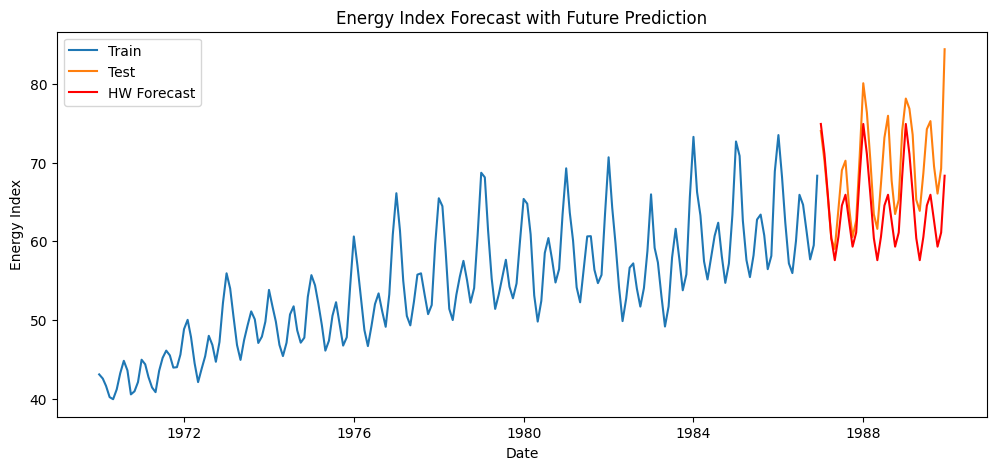

In [44]:
future_forecast = model.forecast(steps=36)
future_dates = pd.date_range(start=test_data.index[-1] + pd.DateOffset(months=1), periods=36, freq='MS')
future_df = pd.DataFrame({'HW Forecast': future_forecast}, index=future_dates)

# Combine the test data and future forecast
combined_df = pd.concat([test_data, future_df])

# Plot the results including the future forecast
plt.figure(figsize=(12, 5))
plt.plot(train_data.index, train_data['EnergyIndex'], label='Train')
plt.plot(test_data.index, test_data['EnergyIndex'], label='Test')
plt.plot(test_data.index, test_data['HW Forecast'], label='HW Forecast', color='red')
# plt.plot(future_df.index, future_df['HW Forecast'], label='Prediction', color='green')
plt.title('Energy Index Forecast with Future Prediction')
plt.xlabel('Date')
plt.ylabel('Energy Index')
plt.legend()
plt.show()


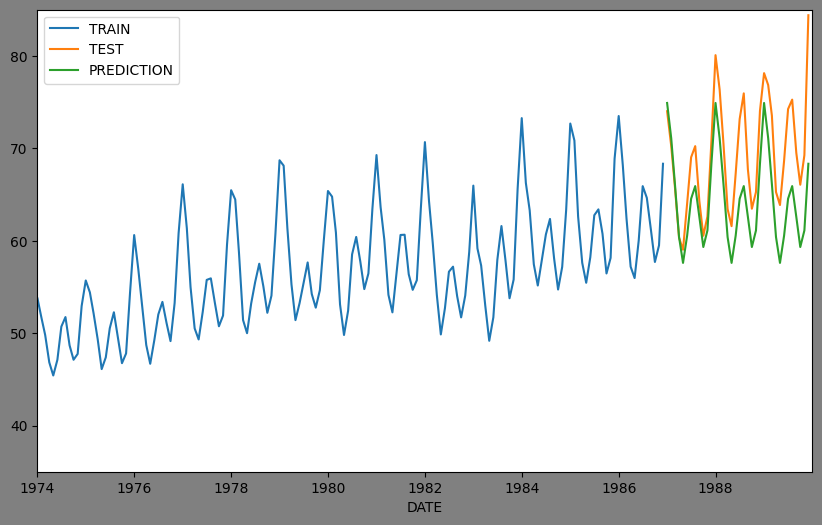

In [46]:
# Plotting
plt.figure(figsize=(10, 6), facecolor='grey')

plt.plot(train_data['EnergyIndex'], label='TRAIN')
plt.plot(test_data['EnergyIndex'], label='TEST')
plt.plot(test_data['HW Forecast'], label='PREDICTION')

plt.xlabel('DATE')
plt.xlim(pd.to_datetime('1974-01-01'), pd.to_datetime('1989-12-31'))
plt.ylim(35, 85)

plt.legend()
plt.grid(False)

plt.show()

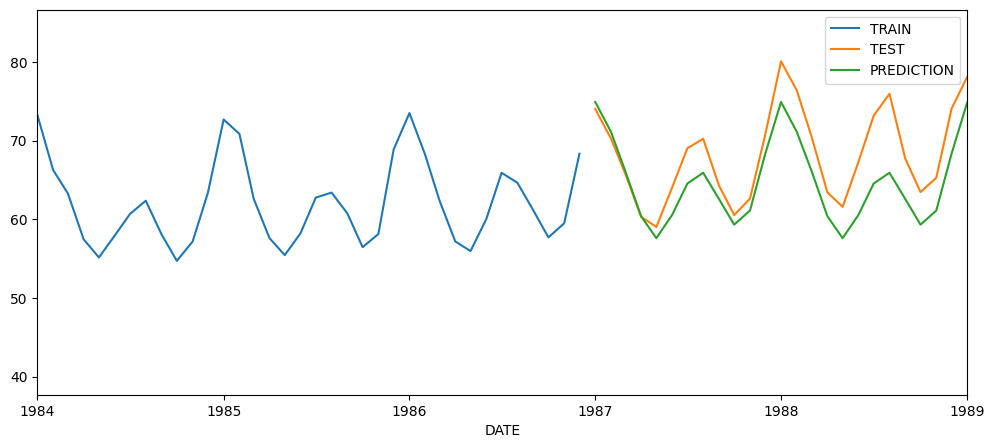

In [52]:
# Plotting
plt.plot(train_data['EnergyIndex'], label='TRAIN')
plt.plot(test_data['EnergyIndex'], label='TEST')
plt.plot(combined_df['HW Forecast'], label='PREDICTION')

plt.xlabel('DATE')
plt.xlim(pd.to_datetime('1984-01-01'), pd.to_datetime('1989-01-01'))

plt.legend()
plt.show()

In [53]:
# Give your conclusion here
# The Holt-Winters Exponential Smoothing model was used to forecast the Energy Index.
# The model was trained on data from 1970 to 1986 and tested on data from 1987 to 1989.
# The forecasted values closely follow the actual values in the test set, indicating that the model has captured the seasonality and trend in the data well.
# The future forecast for the next 36 months (1990-1992) shows a continuation of the observed patterns.
# Overall, the model appears to be effective in predicting the Energy Index, making it a useful tool for future energy production planning.